# RANDOM VARIABLES - COMBINATIONS

## TUTORIAL

In this tutorial we will demonstrate how to initialise several random variables, form linear and non-linear combinations of them and analyse their initial properties.

It is important to note that combinations of random variables through pystochastica's ``RandVar`` class presumes the respective random variables are *independent*. The ``RandVec`` class is used for forming combinations of dependent random variables and will be the subject of a another tutorial.

### LIBRARY IMPORTS

In [1]:
from pystochastica.discrete.variables import RandVar as rv
from pystochastica.discrete.utils import rvdict_to_init

### INITIALISE RANDOM VARIABLES

Random variables $X, Y$ and $Z$ are initialised below.


In [2]:
X_init = {
    'name': 'X',
    'pspace': {
        '-1': 0.35,
        '1': 0.65
    }}
X = rv(**rvdict_to_init(X_init))

Y_init = {
    'name': 'Y',
    'pspace': {
         '-1.5': 0.2,
        '0': 0.5,
        '1.5': 0.3
    }}
Y = rv(**rvdict_to_init(Y_init))

Z_init = {
    'name': 'Z',
    'pspace': {
        '0': 0.15,
        '1.5': 0.33,
        '2': 0.22,
        '2.5': 0.2,
        '3': 0.1
    }}
Z = rv(**rvdict_to_init(Z_init))

### LINEAR COMBINATION

Any linear combination $aX + bY + cZ$ for real values $a, b, c$ can now be represented with the ``RandVar`` objects `X`, `Y` and `Z` above. The following code block provides an illustration with expectation, variance and probability calculated.

In [3]:
U = -X + 5*Y -2.5*Z

U.E, U.V, U.Prob('>=1.5')

(-3.8875, 33.23671875, Decimal('0.23100'))

#### CAVEAT

Random variables as initialised through ``RandVar`` are necessarily independent. We can see this directly in what follows. 

For the random variable $X$, note it is obviously *not* independent of itself. E.g., the probability $X = a$ *and* $X = b$ is zero if $a \neq b$. 
Now if we subtract $X$ from itself, we ought get the zero random variable, i.e., $X - X = 0$. This is the random variable with zero expectation and zero variance. As shown below, `pystochastica` raises an error if we attempt to subtract a ``RandVar`` object from itself, suggesting to the user to use the ``RandVec`` class.


In [4]:
X - X

ValueError: use the RandVec data type to subract self from self

The reason for the above error is due to the following. Lets initialise another random variable with the same law as `X`, say `X2`, subtract it from `X` and calculate its expectation and variance.

In [5]:
X2_init = {
    'name': 'X2', 
    'pspace': {
        '-1': 0.35, 
        '1': 0.65
    }}
X2 = rv(**rvdict_to_init(X2_init))

(X - X2).E, (X - X2).V

(0.0, 1.82)

While the correct expectation is found, see that the variance is not zero. The reason is due to `pystochastica` treating `X` and `X2` as independent. 

If however `X2 == X` as random variables, the variance of `X - X2` must be zero. In order to guarantee this, the calculation must take into account the joint distribution of `X` and `X2` as dependent random variables which is precisely the capability built into the `RandVec` class.

**Remark.** *There are no errors raised when adding a random variable to itself, and doing so appears to generate correct results. Nevertheless, this is strictly not recommended as variable dependencies are not necessary built in to the resulting sum, whereby mathematical errors may unknowingly proliferate.*

### NON-LINEAR COMBINATION

Similarly, powers of ``RandVar`` objects can be formed, leading to non-linear combinations

In [6]:
NONLINEAR = X**2 + Y**2 - Z**2
expectation = NONLINEAR.E
variance = NONLINEAR.V
probability_example = NONLINEAR.Prob('>= 1.5')

print(f"{expectation = }\t{variance = }\t{probability_example = }")

expectation = -1.6475	variance = 8.13699375	probability_example = Decimal('0.07500')


`5` random samples of `NONLINEAR` are:

In [7]:
NONLINEAR.generate(5)

array([Decimal('1.00'), Decimal('-8.00'), Decimal('-3.00'),
       Decimal('-0.75'), Decimal('-1.25')], dtype=object)

### PDF AND CDF

As linear and non-linear combinations of `RandVar` objects are again `RandVar` objects, we can call the `.pdf()` and `.cdf()` methods. This is illustrated below for `NONLINEAR`.


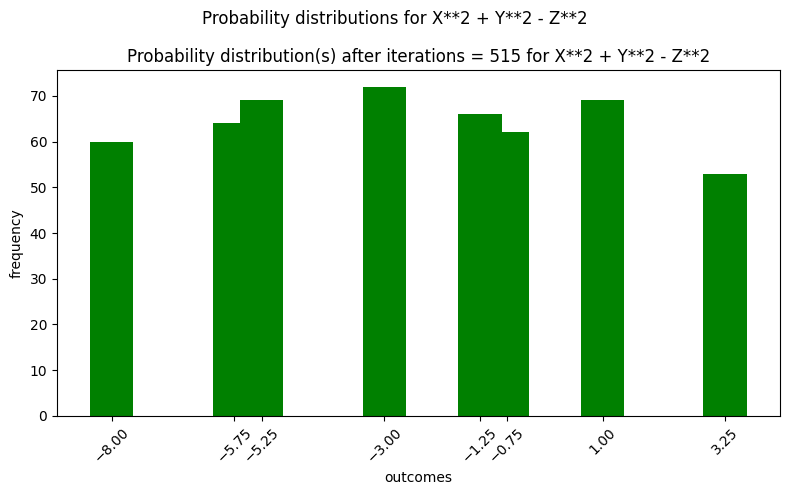

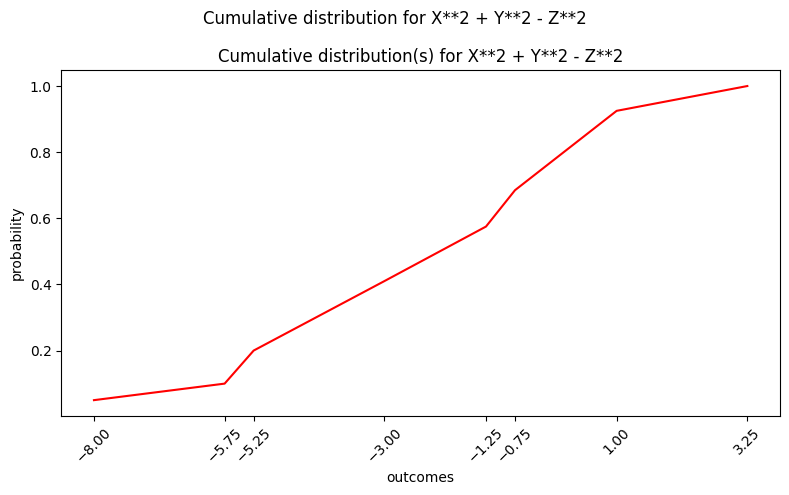

In [8]:
NONLINEAR.pdf(iterations=515, FIGSIZE=(8, 5), plt_kwargs = {'color': 'g', 'width': 0.8}, plt_methods = {'set_xticklabels': {'rotation': 45}})
NONLINEAR.cdf(FIGSIZE=(8, 5), plt_methods = {'set_xticklabels': {'rotation': 45}})